<a href="https://colab.research.google.com/github/AnnandaMS/In-Vehicle-Coupon-Recommendation-/blob/main/Predi%C3%A7%C3%A3o_de_aceita%C3%A7%C3%A3o_de_cupons_em_ve%C3%ADculos_conectados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predição de aceitação de cupons em veículos conectados


Este MVP foi feito a partir do MVP da sprint I, com os capítulos de definição do problema e de análise e pré-processamento de dados já elaborados anteriormente, porém ajustados para o objetivo da sprint II. O capítulo de preparação dos dados inicia o MVP desta sprint, com transformação one-hot enconding e normalização dos dados, preparação dos datasets de treino e teste e seleção dos atributos para utilização no algoritmo. Nos capítulos seguintes foram feitas a modelagem e inferência, finalização do modelo e simulação aplicando dados não vistos anteriormente.

##Definição do problema

###Configurações iniciais e importações

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import LabelEncoder # para classe binária

# Aprendizado de Máquina
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


###Carregar o DataSet

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/AnnandaMS/In-Vehicle-Coupon-Recommendation-/main/in-vehicle-coupon-recommendation.csv"


# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

###Definição do problema

Com a evolução da tecnologia, é cada vez mais comum que equipamentos sejam conectados, seja com uma rede externa, seja com outros dispositivos.
A conectividade pode trazer diversos benefícios aos usuários e comodidades que antes não eram possíveis. Se comunicar com pessoas de todo o mundo com apenas alguns cliques e encontrar informações rapidamente são exemplos dessas mudanças.

Dentro do mundo automotivo, esses benefícios estão sendo explorados com muito entusiasmo, pois trazer facilidades aos clientes é sinônimo de melhor relação com os consumidores da marca e, consequentemente, melhor posicionamento no mercado, melhor aceitação de produtos e maiores lucros para a empresa.

A conectividade nos veículos já é obrigatória em alguns países, pois traz mais agilidade no atendimento de casos de emergência. Porém, é possível aproveitar desse sistema de tecnologia já instalado nos carros para uso diário, com comodidades.

Um exemplo do que se pode oferecer são cupons de ofertas no multimidia do carro, que usam informações como trajeto do carro, horário e preferências pessoais para fazer sugestões de compras. Em um trajeto em que uma pessoa está voltando para casa no final do expediente, por exemplo, e que passa próximo a um supermercado, é possível sugerir um cupom de desconto nesse supermercado para itens que sejam comuns nesse horário, como pães frescos.

No cenário em que a sugestão é boa e o cliente aceita o cupom, existe uma relação de ganha-ganha. O cliente ganha um desconto de um item que já precisaria, o mercado atrai clientes para sua loja e traz valores mais acessíveis, e a fabricante de carros, além de proporcionar essa experiência para seu consumidor, pode monetizar os anúncios impressos no multimídia.

Em contrapartida, caso os anúncios sejam rejeitados, isso pode trazer um desconforto para o cliente, que não se interessa pelo conteúdo exposto, além de que pode ser uma distração para quem dirige. Para o mercado, foi um custo de marketing que não teve retorno, e para a fabricante, uma funcionalidade não utilizada e um cliente não totalmente satisfeito.
Portanto, é importante ser assertivo ao oferecer os cupons.

Felizmente, outro benefício dos carros conectados é poder gerar dados do comportamento de direção. É a partir desses dados que propõe-se aqui um estudo do comportamento de direção em diversos cenários, com diferentes perfis de motoristas, para entender se os cupons são aceitos ou não, e sob quais circunstâncias.



###Definição de variáveis

A base de dados utilizada nesse estudo contém diversas variáveis a respeito do(a) motorista do veículo, com informações pessoais e de comportamento de direção. A variável boolena de resposta informa se o cupom foi aceito ou não, ou seja, faz uma classificação entre as duas opções. Segue abaixo o detalhamento de cada variável.

**Destination**: informa se o destino do(a) motorista é casa (Home), trabalho (Work) ou outro destino não urgente (No Urgent Place).

**Passanger**: informa se o(a) motorista está sozinho (a) (Alone), com amigo (a) (s) (Friend(s)), com filho(a)(s) (Kids(s)) ou parceiro (a) (Partner).

**Weather**: informa se o tempo estava ensolarado (Sunny), chuvoso (Rainy) ou com neve (Snowy).

**Temperature**: informa se a temperatura era aproximadamente 30°F, 55°F ou 80°F.

**Time**: informa se o horário era em torno de 2pm, 10am, 6pm, 7am, ou 10pm.

**Coupon**: informa se o cupom é de restaurante até USD20 (Restaurant(< USD20)), de cafeteria (Coffee House), para retirada (Carry out & Take away),  de bar (Bar) ou restaurante entre USD20 e S50 (Restaurant(USD20-USD50)).


**Expiration**: informa se o cupom expira em até duas horas (2h) ou até um dia (1d).

**Gender**: informa se o gênero do(a) motorista é feminino (Female) ou masculino (Male).

**Age**: informa se a idade do(a) motorista é menor que 21 anos (under21), 21 anos, 26 anos, 31 anos, 36 anos, 41 anos, 46 anos ou acima de 50 anos (50plus).

**MaritalStatus**: informa se o estado civil do(a) motorista é solteiro (Single), com parceiro(a) não casado (a) (Unmarried Partner), com parceiro(a) casado(a) (Married partner), divorciado (Divorced) ou viúvo (Widowed).

**Has_children**: informa se o(a) motorista tem filho(a)(s) (1) ou não (0).

**Education**: informa se o(a) motorista tem ensino médio incompleto (Some High School), ensino médio completo (High School Graduate), curso técnico (Associates degree), ensino superior incompleto (Some college - no degree), ensino superior completo (Bachelors degree) ou pós graduação - mestrado ou doutorado (Graduate degree - Masters or Doctorate).

**Occupation**: informa o campo de ocupação do(a) motorista, sendo possível as seguintes opções: desempregado(a) (Unemployed), arquitetura e engenharia (Architecture & Engineering), estudante (Student), educação, treinamento e biblioteca (Education&Training&Library), suporte de saúde (Healthcare Support), profissionais de saúde e técnicos(as) (Healthcare Practitioners & Technical), vendas e relacionados (Sales & Related), gestão (Management),  design de artes de entrenetimento de esportes e mídia (Arts Design Entertainment Sports & Media), computação e matemática (Computer & Mathematical), ciência social de vida física (Life Physical Social Science), cuidados pessoais e serviços (Personal Care & Service), serviços sociais e comunitários (Community & Social Services), suporte administrativo (Office & Administrative Support), construção e extração (Construction & Extraction), legislativo(Legal), aposentado(a) (Retired), reparos e manutenção de instalações (Installation Maintenance & Repair), transporte (Transportation & Material Moving), negócios e financeiro (Business & Financial), serviço protetivo (Protective Service), preparação e serviços de alimentação (Food Preparation & Serving Related), manufatura (Production Occupations), manutenção e limpeza de prédios e pisos (Building & Grounds Cleaning & Maintenance),  agricultura, pesca e silvicultura (Farming Fishing & Forestry).

**Income**: informa a renda anual do(a) motorista nos seguintes intervalos: menor que USD12500 (Less than USD12500), USD12500 - USD24999, USD25000 - USD37499, USD37500 - USD49999, USD50000 - USD62499, USD62500 - USD74999, USD75000 - USD87499,  USD87500 - USD99999 ou USD100000 ou mais (USD100000 or More).

**Car**: informa o modelo de carro que o(a) motorista possui.

**Bar**: responde à pergunta: "quantas vezes por mês você vai ao bar?", sendo as possíveis respostas: nunca (0), menos que uma vez (< 1), de uma a três vezes (1-3), de quatro e oito vezes(4-8), mais do que oito vezes (>8).

**CoffeeHouse**: responde à pergunta: "quantas vezes por mês você vai a alguma cafeteria?", sendo as possíveis respostas: nunca (0), menos que uma vez (< 1), de uma a três vezes (1-3), de quatro e oito vezes(4-8), mais do que oito vezes (>8).

**CarryAway**: responde à pergunta: "quantas vezes por mês você compra comida para levar para casa?", sendo as possíveis respostas: nunca (0), menos que uma vez (< 1), de uma a três vezes (1-3), de quatro e oito vezes(4-8), mais do que oito vezes (>8).

**RestaurantLessThan20**: responde à pergunta: "quantas vezes por mês você vai ao restaurante e gasta um valor médio de menor de USD20?", sendo as possíveis respostas: nunca (0), menos que uma vez (< 1), de uma a três vezes (1-3), de quatro e oito vezes(4-8), mais do que oito vezes (>8).

**Restaurant20To50**: responde à pergunta: "quantas vezes por mês você ao restaurante e gasta um valor médio entre USD20 e $50?", sendo as possíveis respostas: nunca (0), menos que uma vez (< 1), de uma a três vezes (1-3), de quatro e oito vezes(4-8), mais do que oito vezes (>8).

**ToCoupon_GEQ5min**: informa se a distância ao local de uso do cupom é maior do que 5 minutos dirigindo (valor 1) ou não (valor 0).

**ToCoupon_GEQ15min**: informa se a distância ao local de uso do cupom é maior do que 15 minutos dirigindo (valor 1) ou não (valor 0).

**ToCoupon_GEQ25min**: informa se a distância ao local de uso do cupom é maior do que 25 minutos dirigindo (valor 1) ou não (valor 0).

**Direction_same**: informa se o local de uso do cupom fica na mesma direção que o destino do(a) motorista (valor 1) ou não (valor 0).

**Direction_opp**:informa se o local de uso do cupom fica na direção oposta que o destino do(a) motorista (valor 1) ou não (valor 0).

**Y**: informa se o cupom foi aceito (valor 1) ou não (valor 0).


Analisando o problema e as variáveis propostas, foi feita uma seleção das colunas que se mostraram mais relevantes no tema. Dado que trabalho no ramo automobilístico na área de conectividade e já realizei pesquisas com usuários de carros, utilizarei da minha experiência profissional e também pessoal para essa análise inicial.

A ideia é escolher variáveis que sejam relevantes para o tema, de modo a melhorar a eficiência do processamento de dados, a precisão das análises, interpretabilidade e qualidade geral dos resultados das análises.

No entanto, uma análise mais aprofundada será feita em seguida para os dados selecionados, de modo a obter mais informações sobre o comportamento dos dados a alcançar uma compreensão mais completa e precisa dos dados.

In [ ]:
#Selecionando as colunas iniciais
dataset1 = dataset[['Destination', 'Temperature', 'Time', 'Coupon', 'Gender', 'Age','Income', 'Car', 'Bar',
                    'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'Direction_same', 'Y']]


##Análise e pré-processamento de dados

###Análise incial dos dados

In [ ]:
# Mostra as dimensões do dataset
dataset1.shape
#observa-se que existem 14 critérios, 1 variável de resposta e 12678 viagens

(12678, 15)

In [ ]:
# Mostra as informações do dataset
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12678 entries, 0 to 12677
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Destination           12678 non-null  object
 1   Temperature           12678 non-null  int64 
 2   Time                  12678 non-null  object
 3   Coupon                12678 non-null  object
 4   Gender                12678 non-null  object
 5   Age                   12678 non-null  object
 6   Income                12678 non-null  object
 7   Car                   108 non-null    object
 8   Bar                   12571 non-null  object
 9   CoffeeHouse           12461 non-null  object
 10  CarryAway             12527 non-null  object
 11  RestaurantLessThan20  12548 non-null  object
 12  Restaurant20To50      12489 non-null  object
 13  Direction_same        12678 non-null  int64 
 14  Y                     12678 non-null  int64 
dtypes: int64(3), object(12)
memory usage

In [ ]:
# verificando nulls no dataset
dataset1.isnull().sum()

Destination                 0
Temperature                 0
Time                        0
Coupon                      0
Gender                      0
Age                         0
Income                      0
Car                     12570
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
Direction_same              0
Y                           0
dtype: int64

In [ ]:
#observa-se que a variável "Car" possui muitos valores null. Portanto, analisaremos com mais cuidado essa variável
dataset1['Car']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12673    NaN
12674    NaN
12675    NaN
12676    NaN
12677    NaN
Name: Car, Length: 12678, dtype: object

In [ ]:
dataset1['Car'].value_counts()

Scooter and motorcycle                   22
Mazda5                                   22
do not drive                             22
crossover                                21
Car that is too old to install Onstar    21
Name: Car, dtype: int64

Observa-se que as variáveis que não tem elementos nulos, não são coerentes. Como se trata de uma base de dados para carros conectados, não é possível adquirir valores válidos para motocicletas, Mazda5, motoristas que não dirigem, crossover (que não especifica o modelo) ou quando o carro é muito antigo para instalar o aplicativo de conectividade Onstar. Neste caso, partiremos do pressuposto que esses dados não são válidos, e os dados que não possuem restrições nessa coluna, ou seja, os null, são os valores válidos.

Portanto, os dados inválidos serão excluídos do dataset.

###Limpeza dos dados

In [ ]:
index_def = dataset1[(dataset1['Car']=='Scooter and motorcycle') | (dataset1['Car']=='Mazda5') |
                    (dataset1['Car'] == 'do not drive') | (dataset1['Car']=='crossover') |
                    (dataset1['Car'] == 'Car that is too old to install Onstar')].index
dataset1 = dataset1.drop(index_def)


dataset1.shape

(12570, 15)

In [ ]:
dataset1['Car'].value_counts()


Series([], Name: Car, dtype: int64)

In [ ]:
#percebe-se que não há mais nenhum valor válido na coluna 'car'. Portanto, ela pode ser excluída.
dataset1 = dataset1.drop('Car', axis=1)

In [ ]:
#Agora, é seguro eliminar as linhas com valores null, já que não há mais a coluna 'car'
# eliminando linhas que tenham algum valor missing
dataset1.dropna(how='any', inplace=True)

# exibindo as dimensões do dataset
print(dataset1.shape)

(11965, 14)


In [ ]:
# verificando novamente nulls no dataset
dataset1.isnull().sum()

Destination             0
Temperature             0
Time                    0
Coupon                  0
Gender                  0
Age                     0
Income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
Direction_same          0
Y                       0
dtype: int64

In [ ]:
#Não há mais nenhum valor null no dataset
# Mostra as 10 primeiras linhas do dataset
dataset1.head(10)

,Destination,Temperature,Time,Coupon,Gender,Age,Income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Direction_same,Y
22,No Urgent Place,55,2PM,Restaurant(<20),Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,1
23,No Urgent Place,80,10AM,Coffee House,Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,0
24,No Urgent Place,80,10AM,Bar,Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,1
25,No Urgent Place,80,10AM,Carry out & Take away,Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,0
26,No Urgent Place,80,2PM,Coffee House,Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,0
27,No Urgent Place,80,2PM,Coffee House,Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,0
28,No Urgent Place,80,2PM,Coffee House,Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,0
29,No Urgent Place,80,2PM,Restaurant(<20),Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,1
30,No Urgent Place,80,6PM,Coffee House,Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,0
31,No Urgent Place,80,6PM,Restaurant(<20),Male,21,$62500 - $74999,0,<1,4-8,4-8,<1,0,1


###Manipulação de variáveis

Observa-se que para as variáveis de frequência 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' e 'Restaurant20To50, existem valores para frequência 0 e menor que 1. Como se trata de uma variável inteira, não faz sentido ter a diferenciação entre elas. Logo, os dois valores serão agrupados em "0".

In [ ]:
#selecionando as colunas para fazer as alterações
colunas = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
dataset1[colunas] = dataset1[colunas].replace('<1','0')
dataset1.head()


,Destination,Temperature,Time,Coupon,Gender,Age,Income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Direction_same,Y
22,No Urgent Place,55,2PM,Restaurant(<20),Male,21,$62500 - $74999,0,0,4-8,4-8,0,0,1
23,No Urgent Place,80,10AM,Coffee House,Male,21,$62500 - $74999,0,0,4-8,4-8,0,0,0
24,No Urgent Place,80,10AM,Bar,Male,21,$62500 - $74999,0,0,4-8,4-8,0,0,1
25,No Urgent Place,80,10AM,Carry out & Take away,Male,21,$62500 - $74999,0,0,4-8,4-8,0,0,0
26,No Urgent Place,80,2PM,Coffee House,Male,21,$62500 - $74999,0,0,4-8,4-8,0,0,0


Observa-se que a variável de temperatura está em °F. Para tornar a leitura mais fácil, será aplicada a fórmula para transformação dos valores para °C.

In [ ]:
#Transformando a variável 'Temperature' de °F para °C
dataset1['Temperature']=((dataset1['Temperature']-32)*5/9).round(1)

#adicionando a unidade de medida no nome da coluna
dataset1.rename(columns = {'Temperature':'Temperature (°C)'}, inplace = True)

#visualizando a coluna 'Temperature (°C)'
dataset1.loc[:,'Temperature (°C)']

22       12.8
23       26.7
24       26.7
25       26.7
26       26.7
         ... 
12673    12.8
12674    12.8
12675    -1.1
12676    -1.1
12677    26.7
Name: Temperature (°C), Length: 11965, dtype: float64

A coluna de horários também está num formato não usual no Brasil. Além disso, transformando os dados de objeto para inteiro, seria possível realizar mais análises numéricas.

In [ ]:
# mostrando os valores da coluna 'time'
dataset1['Time'].value_counts()

6PM     3049
7AM     2997
10AM    2132
2PM     1894
10PM    1893
Name: Time, dtype: int64

In [ ]:
#verificando o tipo de variável dos dados na coluna 'time'
print(dataset1['Time'].dtype)

object


In [ ]:
#transformando os horários do formato am/pm para 24h
dataset1['Time'] = dataset1['Time'].replace(['7AM', '10AM', '2PM', '6PM', '10PM'], ['7', '10', '14', '18', '22'])

#transformando os dados em inteiros
dataset1['Time'] = dataset1['Time'].astype(int)

#adicionando a unidade de medida no nome da coluna
dataset1.rename(columns = {'Time':'Time (h)'}, inplace = True)

#visualizando a coluna 'time (h)'
dataset1.loc[:,'Time (h)']


22       14
23       10
24       10
25       10
26       14
         ..
12673    18
12674     7
12675     7
12676     7
12677     7
Name: Time (h), Length: 11965, dtype: int64

Feitas as manipulações iniciais dos dados, partiremos para as visualizações gráficas e análises estatísticas, para verificar se mais alguma modificação é necessária, observar o comportamento dos dados e obter insights sobre eles.

###Análises estatísticas

In [ ]:
# Fazendo um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset1.describe()

,Temperature (°C),Time (h),Direction_same,Y
count,11965.000000,11965.000000,11965.000000,11965.000000
mean,17.435270,13.818888,0.216047,0.569411
std,10.643983,5.412664,0.411564,0.495179
min,-1.100000,7.000000,0.000000,0.000000
25%,12.800000,7.000000,0.000000,0.000000
50%,26.700000,14.000000,0.000000,1.000000
75%,26.700000,18.000000,0.000000,1.000000
max,26.700000,22.000000,1.000000,1.000000


A partir do quadro acima, bserva-se que os valores máximos e mínimos das temperaturas(Temperature (°C)) e horário (Time (h)) são coerentes, e as variáveis de direção e resposta (Direction_same e Y) são variáveis booleanas. As médias das variáveis estão dentro do valor esperado, e a contagem é a mesma para todas elas. Ou seja, não há nenhum outlier nem valor faltante.

In [ ]:
# Verificando a distribuição das classes
dataset1.groupby('Y').size()


Y
0    5152
1    6813
dtype: int64

Observa-se uma desproporcionalidade entre as classes. Logo, será necessário ajustar as proporções quando o dataset for utilizado para treinamento de máquina e houver a necessidade de dividi-lo em bases de treino e teste.

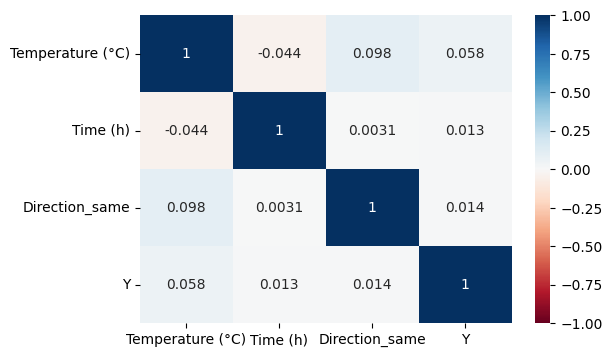

In [ ]:
# Verificando a correlação entre os valores numéricos com a matriz de correlação do Seaborn
plt.figure(figsize = (6,4))
sns.heatmap(dataset1.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

A matriz apresentada acima mostra tons claros de azul e vermelho para a correlação entre as variáveis, com exceção da diagonal que mostra a correlação da variável com ela mesma. Portanto, percebe-se que não há nenhuma correlação muito forte, nem positiva, nem negativa, entre as variáveis apresentadas.

###Visualização dos dados

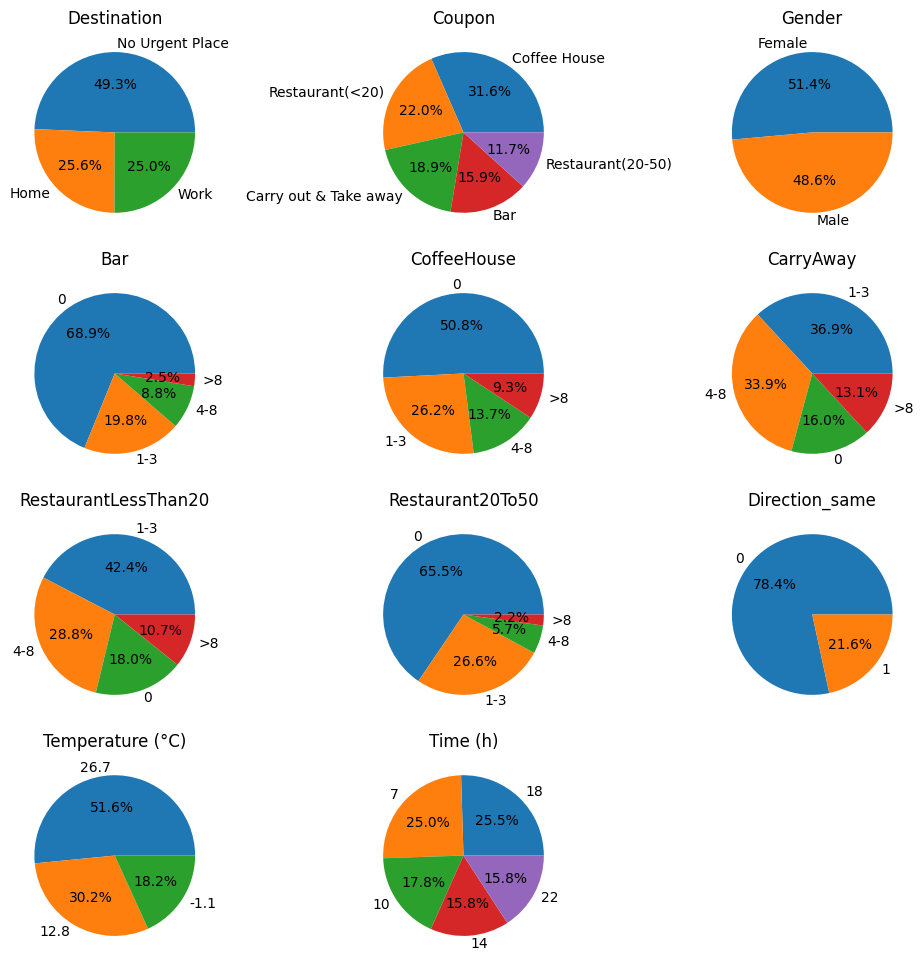

In [ ]:
#plotando gráficos de pizza para analisar as variáveis com até 5 classes
colunas = ['Destination', 'Coupon', 'Gender', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
           'Restaurant20To50', 'Direction_same', 'Temperature (°C)', 'Time (h)']
valores = [dataset1[coluna].value_counts() for coluna in colunas]
plt.figure(figsize=(12,12))


for i, valor in enumerate(valores):
  plt.subplot(4, 3, i+1)
  plt.pie(valor.values, labels=valor.index, autopct = '%1.1f%%')
  plt.title(colunas[i])
plt.subplots_adjust(wspace=0.5)
plt.show()

A partir da visualização dos dados, observa-se que:

-Destination: o destino dos motoristas é majoritariamente para outros lugares que não trabalho ou domicílio.

-Coupon: as classes estão bem divididas, com predominância para as cafeterias.

-Gender: as classes estão bem divididades entre os gêneros feminino e masculino, com leve maioria no gênero feminino.

-Bar, CoffeeHouse, CarryAway: as duas primeiras variáveis apresentam proporções decrescentes  de acordo com o aumento da frequência. Porém, a variável CarryAway apresenta os maiores valores para frequências intermediárias (1-8 vezes por mês), indicando uma preferência para pedidos de comidas para entrega.

-RestaurantLessthan20 e Restaurant20to50: para a primeira variável, em que os gastos com restaurantes são menores, há maior adesão para as frequências intermediárias(1-8 vezes por mês), enquanto que para gastos maiores, a maior frequência é de nenhuma vez por mês.

-Direction_same: na maior parte das viagens, os locais para uso dos cupons são opostos à direção do(a) motorista, podendo ser um fator determinante na aceitação ou não do cupom.

-Temperature (°C) e Time (h): as temperaturas são em geral amenas e os horários equilibrados entre o dia.

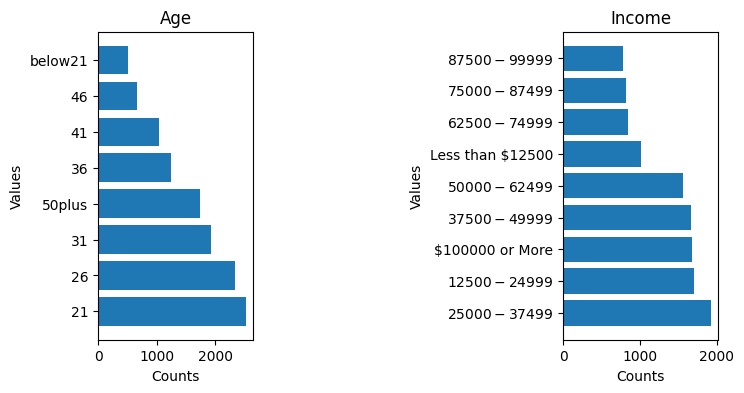

In [ ]:
#plotando gráficos de barra para analisar as variáveis com mais de 5 classes

fig, ax = plt.subplots (nrows = 1, ncols=2, figsize = (8, 4))

#criando a primeira subparcela e o primeiro gráfico de barras
counts1 = dataset1['Age'].value_counts()
ax[0].barh(counts1.index,counts1.values)
ax[0].set_title ('Age')
ax[0].set_xlabel ('Counts')
ax[0].set_ylabel('Values')

#criando a segunda subparcela e o segundo gráfico de barras
counts2= dataset1['Income'].value_counts()
ax[1].barh(counts2.index, counts2.values)
ax[1].set_title ('Income')
ax[1].set_xlabel ('Counts')
ax[1].set_ylabel('Values')

#ajustando o espaçamento entre os gráficos
plt.subplots_adjust(wspace = 2)

#exibindo os gráficos
plt.show()


A partir dos gráficos de barras acima, não é possível identificar uma tendência para idades (age) ou rendas (income) maiores ou menores. O que se pode notar são valores bastante heterogêneos e uma amostra bastante diversificada nesses quesitos.

##Preparação dos dados

Com o objetivo de ter uma escala comum para os valores, os dados serão transformados a partir da técnica de normalização (para dados numéricos) e one-hot-enconding (para dados categóricos). Dessa maneira, é possível utilizar os dados em processos de aprendizagem de máquina sem distorcer as diferenças nos intervalos de valores.
Além disso, o dataset será dividido em treino, com 80% dos dados, e teste, com 20% dos dados totais.

In [ ]:
#reordenando as colunas pelo tipo de variável
cols = ['Destination', 'Coupon', 'Gender', 'Age', 'Income', 'Bar', 'CoffeeHouse',
 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'Temperature (°C)', 'Time (h)',
 'Direction_same', 'Y']
dataset1 = dataset1[cols]
dataset1.head()

,Destination,Coupon,Gender,Age,Income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Temperature (°C),Time (h),Direction_same,Y
22,No Urgent Place,Restaurant(<20),Male,21,$62500 - $74999,0,0,4-8,4-8,0,12.8,14,0,1
23,No Urgent Place,Coffee House,Male,21,$62500 - $74999,0,0,4-8,4-8,0,26.7,10,0,0
24,No Urgent Place,Bar,Male,21,$62500 - $74999,0,0,4-8,4-8,0,26.7,10,0,1
25,No Urgent Place,Carry out & Take away,Male,21,$62500 - $74999,0,0,4-8,4-8,0,26.7,10,0,0
26,No Urgent Place,Coffee House,Male,21,$62500 - $74999,0,0,4-8,4-8,0,26.7,14,0,0


In [ ]:
test_size = 0.20  # tamanho do conjunto de teste
seed = 7  # semente aleatória

# Separar variáveis categóricas e numéricas
categorical_features = dataset1.values[:, 0:10]
numeric_features = dataset1.values[:, 10:13]
y = dataset1.values[:, 13]

# Divisão em conjuntos de treino e teste
X_train_cat, X_test_cat, X_train_num, X_test_num, y_train, y_test = train_test_split(categorical_features,
                                                                                    numeric_features,
                                                                                    y,
                                                                                    test_size=test_size,
                                                                                    random_state=seed,
                                                                                    stratify=y)

###One-hot encoding

In [ ]:
# Codificação one-hot para variáveis categóricas no conjunto de treinamento
encoder = OneHotEncoder(sparse=False)
X_train_cat_encoded = encoder.fit_transform(X_train_cat)

# Codificação one-hot para variáveis categóricas no conjunto de teste
X_test_cat_encoded = encoder.transform(X_test_cat)

# exibindo alguns dados transformados
print("Atributos transformados:")
print(X_train_cat_encoded[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]


###Normalização

In [ ]:
# Normalização para variáveis numéricas no conjunto de treinamento
scaler = StandardScaler()
X_train_num_normalized = scaler.fit_transform(X_train_num)

# Normalização para variáveis numéricas no conjunto de teste
X_test_num_normalized = scaler.transform(X_test_num)

# Exibindo os dados transformados
print("Dados Originais: \n\n", X_train_num)
print("\nDados Normalizados: \n\n", X_train_num_normalized)



Dados Originais: 

 [[26.7 18 0]
 [26.7 14 0]
 [26.7 14 0]
 ...
 [12.8 7 0]
 [26.7 18 0]
 [26.7 7 0]]

Dados Normalizados: 

 [[ 0.87594286  0.76615308 -0.52949394]
 [ 0.87594286  0.03087964 -0.52949394]
 [ 0.87594286  0.03087964 -0.52949394]
 ...
 [-0.42985453 -1.25584888 -0.52949394]
 [ 0.87594286  0.76615308 -0.52949394]
 [ 0.87594286 -1.25584888 -0.52949394]]


In [ ]:
# Combinar variáveis categóricas e numéricas para conjuntos de treinamento e teste
X_train = np.concatenate((X_train_cat_encoded, X_train_num_normalized), axis=1)
X_test = np.concatenate((X_test_cat_encoded, X_test_num_normalized), axis=1)

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

###Transformação para classe binária

In [ ]:
# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicar a codificação de rótulo aos rótulos binários
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

##Modelagem e inferência

Primeiramente testaremos diferentes algoritmos para aprendizado de máquina para observar a performance deles. Utilizaremos validação cruzada a fim de melhor estimar o desempenho dos modelos. (4min)

LR: 0.663919 (0.017282)
KNN: 0.654094 (0.014623)
CART: 0.656705 (0.015808)
NB: 0.642295 (0.016512)
SVM: 0.712288 (0.017269)
Bagging: 0.721897 (0.015648)
RF: 0.733495 (0.013180)
ET: 0.729106 (0.012871)
Ada: 0.663607 (0.018595)
GB: 0.700798 (0.015751)
Voting: 0.708424 (0.015476)


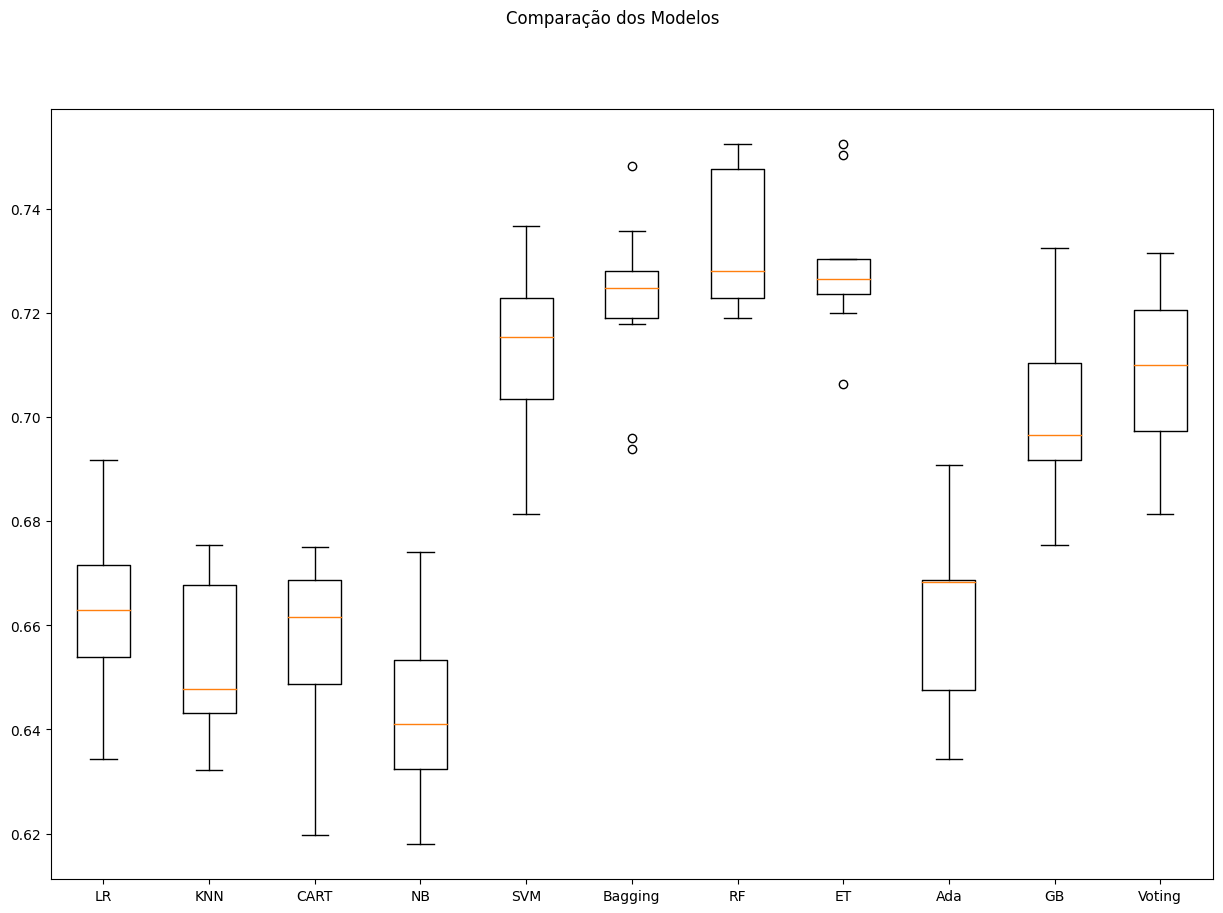

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Agora faremos a utilização da biblioteca Grid Search para encontrar novos resultados, modificando os hiperparâmetros dos algoritmos que obtiveram os melhores desempenhos, ou seja, bagging, random forest - RF e extra trees - ET.

###Grid Search para bagging

In [ ]:
# Tuning do bagging

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
bagging = ('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees))

pipelines.append(('Bagging', Pipeline(steps=[bagging])))

param_grid = {
    'Bagging__n_estimators': [3, 6, 9, 12, 15, 18, 21, 27],
    'Bagging__max_samples': [0.7,0.8,0.9],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Bagging - Melhor: 0.721794 usando {'Bagging__max_samples': 0.7, 'Bagging__n_estimators': 27}


###Grid Search para Random Forest

In [ ]:
np.random.seed(7)  # Definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
random_forest = ('Random Forest', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))

pipelines.append(('RF', Pipeline(steps=[random_forest])))

param_grid = {
    'Random Forest__n_estimators': [10, 50, 100, 200],
    'Random Forest__max_depth': [None, 5, 10, 20],
    'Random Forest__min_samples_split': [2, 5, 10],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

RF - Melhor: 0.746555 usando {'Random Forest__max_depth': None, 'Random Forest__min_samples_split': 5, 'Random Forest__n_estimators': 200}


###Grid Search para Extra Trees

In [ ]:
np.random.seed(7)  # Definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
extra_trees = ('Extra Trees', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))

pipelines.append(('ET', Pipeline(steps=[extra_trees])))

param_grid = {
    'Extra Trees__n_estimators': [10, 50, 100, 200],
    'Extra Trees__max_depth': [None, 5, 10, 20],
    'Extra Trees__min_samples_split': [2, 5, 10],
}
# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

ET - Melhor: 0.744675 usando {'Extra Trees__max_depth': 20, 'Extra Trees__min_samples_split': 5, 'Extra Trees__n_estimators': 200}


##Finalização do modelo

O modelo que alcançou melhores resultados foi o Extra Trees, com 74,5% de acertos. Portando, finalizaremos o modelo treinado com todo o conjunto de treinamento  - sem validação cruzada - para confirmar os resultados. Após o treinamento, calcularemos a acurácia.

In [ ]:
# Selecionar o modelo Extra Trees com os melhores parâmetros
model = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=5)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
predictions = model.predict(X_test)

# Imprimir as previsões
accuracy = accuracy_score(y_test, predictions)
print("Previsões do modelo Extra Trees nos dados de teste: ",accuracy_score(y_test, predictions))

Previsões do modelo Extra Trees nos dados de teste:  0.7170915169243627


Observa-se que o resultado com todo o dataset de treino foi similar ao anterior com validação cruzada, com 71,7 % de acertos. Esse resultado, apesar de não ser o ideial, ainda contribui para a previsão de novas entradas.
É importante ressaltar, no entanto, que outros métodos devem ser utilizados para contribuir com a decisão dos anúncios em multimídia, como por exemplo, pesquisas de mercado.
A seguir, o modelo será treinado com todo o dataset, incluindo o que antes era separado como dataset de teste para prepará-lo para produção.

In [ ]:
# Separar variáveis categóricas e numéricas
categorical_features = dataset1.values[:, 0:9]
numeric_features = dataset1.values[:, 10:13]
y = dataset1.values[:, 13]
# Codificação one-hot para variáveis categóricas
encoder = OneHotEncoder(sparse=False)
X_cat_encoded = encoder.fit_transform(categorical_features)
# Normalização para variáveis numéricas
scaler = StandardScaler()
X_num_normalized = scaler.fit_transform(numeric_features)
# Aplicar a codificação de rótulo aos rótulos binários
y = label_encoder.fit_transform(y)
# Combinar variáveis categóricas e numéricas
X = np.concatenate((X_cat_encoded, X_num_normalized), axis=1)

model.fit(X, y)

ExtraTreesClassifier(min_samples_split=5)

##Simulando a aplicação do modelo em dados não vistos

Para a simulação de novos dados, será feita a leitura de uma tabela com seis exemplos. Será levado em consideração que os dados já estão pré-processados, conforme tratamento feito anteriormente para os dados de treinamento. No entanto, como os dados são reais, a normalização e one-hot enconding será feita novamente, pois esse procedimento seria necessário para todas as entradas novas.

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/AnnandaMS/In-Vehicle-Coupon-Recommendation-/main/in-vehicle-coupon-recommendation_PRD.csv"


# Lê o arquivo
novosdados = pd.read_csv(url, delimiter=';')

In [ ]:
novosdados.head()

,Destination,Coupon,Gender,Age,Income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Temperature (°C),Time (h),Direction_same
0,No Urgent Place,Coffee House,Male,21,$75000 - $87499,1-3,<1,4-8,1-3,1-3,26.7,14,0
1,No Urgent Place,Bar,Male,36,$87500 - $99999,<1,<1,<1,1-3,<1,26.7,10,0
2,Home,Coffee House,Female,31,$100000 or More,<1,<1,>8,4-8,1-3,26.7,18,0
3,No Urgent Place,Bar,Female,below21,$12500 - $24999,>8,1-3,<1,4-8,>8,12.8,10,0
4,Home,Carry out & Take away,Female,36,$12500 - $24999,<1,<1,1-3,<1,<1,-1.1,18,0


In [ ]:
# Separar variáveis categóricas e numéricas
categorical = novosdados.values[:, 0:10]
numeric = novosdados.values[:, 10:13]

A quantidade de algarismos da transformação one-hot enconding depende da quantidade de classes para cada variável, ou seja, para uma variável com 3 opções o dado transformado terá 3 algarismos, enquanto se tivesse 8 opções teria 8 algarismos. A fim de transformar os novos dados da mesma maneira que foi feito no treinamento, esse informação será considerada no código a seguir.

In [ ]:
# Quantidade de opções em cada variável categórica, de acordo com o modelo treinado
quantidade_opcoes = [3, 5, 2, 8, 10, 3, 3, 3, 3, 3]

# Codificação one-hot para variáveis categóricas no conjunto de treinamento
encoder = OneHotEncoder(categories=[range(n) for n in quantidade_opcoes], sparse=False, handle_unknown='ignore')
entrada_encoded = encoder.fit_transform(categorical)

# Normalização para variáveis numéricas no conjunto de treinamento
scaler = StandardScaler()
entrada_normalized = scaler.fit_transform(numeric)

#concanetação das variáveis de entrada (numéricas e categóricas)
entrada = np.concatenate((entrada_encoded, entrada_normalized), axis=1)


Finalmente, será feita a predição dos novos dados a partir do modelo proposto.

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(entrada)
print(saidas)

[1 1 1 1 1 1]
